In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df = pd. read_csv(r"C:\Users\HP Demo\OneDrive - Stellenbosch University\Desktop\Python\Python\stack-overflow-developer-survey-2019\survey_results_public.csv")
df_schema = pd.read_csv(r"C:\Users\HP Demo\OneDrive - Stellenbosch University\Desktop\Python\Python\stack-overflow-developer-survey-2019\survey_results_schema.csv",index_col='Column')
df_schema

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
OpenSourcer,How often do you contribute to open source?
OpenSource,How do you feel about the quality of open sour...
...,...
Sexuality,Which of the following do you currently identi...
Ethnicity,Which of the following do you identify as? Ple...
Dependents,"Do you have any dependents (e.g., children, el..."


In [4]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [5]:
schema = df_schema.QuestionText
schema.head

<bound method NDFrame.head of Column
Respondent      Randomized respondent ID number (not in order ...
MainBranch      Which of the following options best describes ...
Hobbyist                                  Do you code as a hobby?
OpenSourcer           How often do you contribute to open source?
OpenSource      How do you feel about the quality of open sour...
                                      ...                        
Sexuality       Which of the following do you currently identi...
Ethnicity       Which of the following do you identify as? Ple...
Dependents      Do you have any dependents (e.g., children, el...
SurveyLength    How do you feel about the length of the survey...
SurveyEase      How easy or difficult was this survey to compl...
Name: QuestionText, Length: 85, dtype: object>

In [6]:
schema["Sexuality"]
schema['YearsCodePro']
schema['SOHowMuchTime']

"About how much time did you save? If you're not sure, please use your best estimate."

DATA PROCESSING AND CLEANING 

Demographics of the survey respondents and the global programming community
Distribution of programming skills, experience, and preferences
Employment-related information, preferences, and opinions

In [7]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'ConvertedComp'
]
len(selected_columns)

17

In [8]:
survey_df = df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,ConvertedComp
0,United Kingdom,14.0,Man,Primary/elementary school,NaN,Yes,10,4,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN
1,Bosnia and Herzegovina,19.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,17,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,"Not employed, but looking for work","Developer, desktop or enterprise applications;...",NaN,NaN,Financial performance or funding status of the...,NaN
2,Thailand,28.0,Man,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,Yes,22,3,1,HTML/CSS,Elixir;HTML/CSS,Employed full-time,"Designer;Developer, back-end;Developer, front-...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",8820.0
3,United States,22.0,Man,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",No,16,3,Less than 1 year,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,Employed full-time,"Developer, full-stack",80.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",61000.0
4,Ukraine,30.0,Man,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14,16,9,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Employed full-time,"Academic researcher;Developer, desktop or ente...",55.0,Slightly dissatisfied,"Industry that I'd be working in;Languages, fra...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,Canada,NaN,Man,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,HTML/CSS;JavaScript;Other(s):,C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN
88879,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN
88881,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN


In [9]:
schema= schema[selected_columns]
schema

Column
Country                           In which country do you currently reside?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following do you currently identi...
EdLevel                   Which of the following best describes the high...
UndergradMajor            What was your main or most important field of ...
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              How many years have you coded professionally (...
LanguageWorkedWith        Which of the following programming, scripting,...
LanguageDesireNextYear    Which of the following programming, scripting,...
Employment                Which of the following best describes your cur...
DevType                   Which of the following describe you? Please se...
WorkW

In [27]:
survey_df.info()
survey_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88397 entries, 0 to 88882
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 87724 non-null  object 
 1   Age                     78318 non-null  float64
 2   Gender                  84399 non-null  object 
 3   EdLevel                 85407 non-null  object 
 4   UndergradMajor          74786 non-null  object 
 5   Hobbyist                87856 non-null  object 
 6   Age1stCode              86627 non-null  object 
 7   YearsCode               86929 non-null  float64
 8   YearsCodePro            69469 non-null  float64
 9   LanguageWorkedWith      86567 non-null  object 
 10  LanguageDesireNextYear  83124 non-null  object 
 11  Employment              86188 non-null  object 
 12  DevType                 80396 non-null  object 
 13  WorkWeekHrs             63712 non-null  float64
 14  JobSat                  70149 non-null

(88397, 18)

In [32]:
survey_df["Age"].unique()
survey_df['Age'] = pd.to_numeric(survey_df.Age)
survey_df["Age"].unique()


array([14. , 19. , 28. , 22. , 30. , 42. , 24. , 23. ,  nan, 21. , 31. ,
       20. , 26. , 29. , 38. , 47. , 34. , 32. , 25. , 17. , 35. , 27. ,
       44. , 43. , 62. , 37. , 45. , 18. , 33. , 36. , 16. , 39. , 64. ,
       41. , 54. , 49. , 40. , 56. , 12. , 58. , 46. , 59. , 51. , 48. ,
       57. , 52. , 50. , 23.9, 55. , 15. , 67. , 13. , 53. , 69. , 65. ,
       17.5, 63. , 61. , 68. , 73. , 70. , 60. , 16.5, 46.5, 11. , 71. ,
       97. , 29.5, 77. , 74. , 26.5, 24.5, 78. , 72. , 66. , 76. , 10. ,
       75. , 99. , 83. , 79. , 36.8, 14.1, 13.5, 98. , 43.5, 22.5, 31.5,
       21.5, 28.5, 33.6, 38.5, 30.8, 24.8, 90. , 81. , 17.3, 19.9, 80. ,
       85. , 88. , 23.5, 16.9, 20.9, 91. , 98.9, 57.9, 95. , 37.5, 14.5,
       82. , 84. , 37.3, 33.5, 53.8, 31.4, 87. ])

In [30]:
survey_df["Age1stCode "]= pd.to_numeric(survey_df.Age1stCode, errors= "coerce")
survey_df["Age1stCode "].unique()

array([10., 17., 22., 16., 14., 15., 11., 20., 13., 18., 12., 19., 21.,
        8., 35.,  6.,  9., 29.,  7.,  5., 23., 30., nan, 27., 24., 33.,
       25., 26., 39., 36., 38., 28., 31., 32., 37., 50., 65., 42., 34.,
       40., 67., 43., 44., 60., 46., 45., 49., 51., 41., 55., 48., 53.,
       54., 47., 56., 79., 61., 68., 77., 66., 52., 80., 62., 84., 57.,
       58., 63.])

In [13]:
survey_df["YearsCode"].replace('Less than 1 year',0, inplace = True)
survey_df["YearsCode"].replace('More than 50 years',51, inplace= True)
survey_df["YearsCode"]= pd.to_numeric(survey_df.YearsCode, errors= 'coerce')
survey_df["YearsCode"].unique()


array([ 4., nan,  3., 16., 13.,  6.,  8., 12.,  2.,  5., 17., 10., 14.,
       35.,  7.,  0., 30.,  9., 26., 40., 19., 15., 20., 28., 25.,  1.,
       22., 11., 33., 50., 41., 18., 34., 24., 23., 42., 27., 21., 36.,
       32., 39., 38., 31., 37., 51., 29., 44., 45., 48., 46., 43., 47.,
       49.])

In [14]:
survey_df["YearsCodePro"]= pd.to_numeric(survey_df.YearsCodePro, errors= 'coerce')
survey_df["YearsCodePro"].unique()

array([nan,  1.,  9.,  3.,  4., 10.,  8.,  2., 13., 18.,  5., 14., 22.,
       23., 19., 35., 20., 25.,  7., 15., 27.,  6., 48., 12., 31., 11.,
       17., 16., 21., 29., 30., 26., 33., 28., 37., 40., 34., 24., 39.,
       38., 36., 32., 41., 45., 43., 44., 42., 46., 49., 50., 47.])

In [15]:
survey_df.describe()

,Age,YearsCode,YearsCodePro,WorkWeekHrs,ConvertedComp,Age1stCode
count,79210.000000,87938.000000,70285.000000,64503.000000,5.582300e+04,87088.000000
mean,30.336699,11.662114,8.590311,42.127197,1.271107e+05,15.456446
std,9.178390,9.152772,7.533009,37.287610,2.841523e+05,4.993287
min,1.000000,0.000000,1.000000,1.000000,0.000000e+00,5.000000
25%,24.000000,5.000000,3.000000,40.000000,2.577750e+04,12.000000
50%,29.000000,9.000000,6.000000,40.000000,5.728700e+04,15.000000
75%,35.000000,15.000000,12.000000,44.750000,1.000000e+05,18.000000
max,99.000000,51.000000,50.000000,4850.000000,2.000000e+06,84.000000


In [16]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

In [17]:
survey_df["Gender"].unique()
survey_df.where(~(survey_df.Gender.str.contains(';', na=  False)), np.nan, inplace =True)

Exploratory Analysis and Visualization

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Country 

In [19]:
schema.Country

'In which country do you currently reside?'

In [20]:
Top_countries=survey_df['Country'].value_counts().head(15)

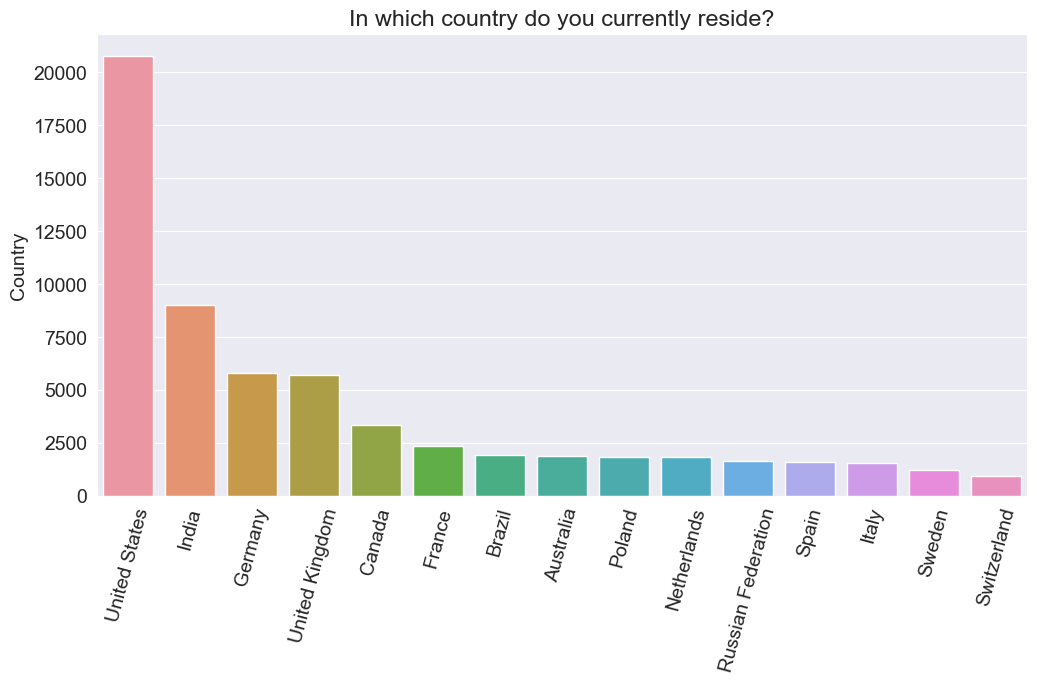

In [21]:
plt.figure(figsize = (12,6))
plt.xticks( rotation =75)
plt.title (schema.Country)
sns.barplot(x= Top_countries.index, y=Top_countries);

In [22]:
import folium

In [23]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [24]:
country_counts = survey_df.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df.head(13)

,Country,Count
0,United States,20769
1,India,9001
2,Germany,5820
3,United Kingdom,5700
4,Canada,3376
5,France,2360
6,Brazil,1925
7,Australia,1890
8,Poland,1861
9,Netherlands,1842


In [25]:
country_counts_df.at[0, 'Country'] = 'United States of America'
country_counts_df.at[12, 'Country'] = 'Italy'

In [ ]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 3_462, 6_924, 10_385, 13_846, 17_308, 20_769],
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

m

AGE

In [ ]:
import plotly.express as px
px.histogram(survey_df, x = "Age",marginal="box", title='Age of Respondents')
